In [346]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score


In [220]:
data = pd.read_csv('50_Startups.csv')

In [221]:
data

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [222]:
data.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [223]:
data.duplicated().sum()

0

In [224]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,48.000000,48.000000,48.000000,48.000000
mean,76793.349583,121142.109583,218876.704792,115487.308958
std,44224.086236,28526.050007,118303.028079,37110.594903
min,542.050000,51283.140000,0.000000,35673.410000
25%,45528.002500,102579.505000,136984.482500,95036.680000
50%,74661.715000,122699.795000,221897.880000,108643.015000
75%,105065.712500,145190.700000,300632.782500,142253.990000
max,165349.200000,182645.560000,471784.100000,192261.830000


<AxesSubplot:>

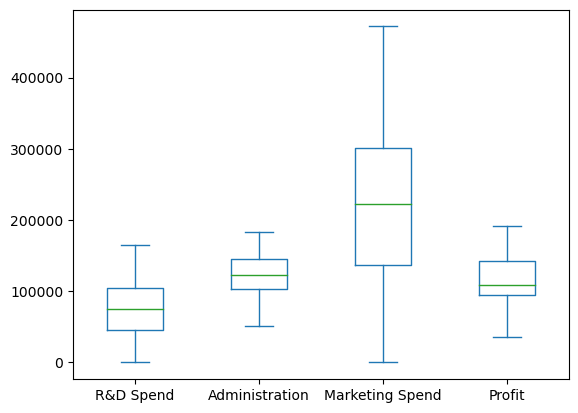

In [225]:
data.plot(kind = 'box')

/Users/mohamednoordeenalaudeen/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='R&D Spend'>

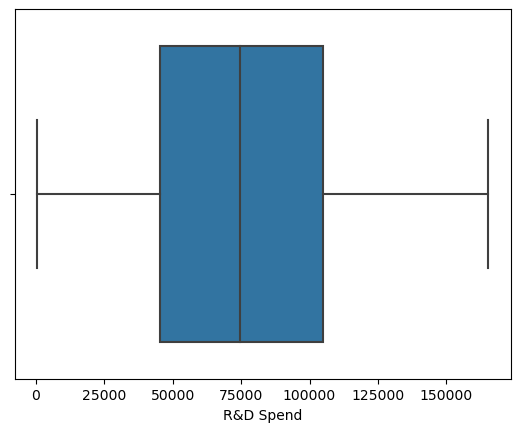

In [226]:
sns.boxplot(data['R&D Spend'])

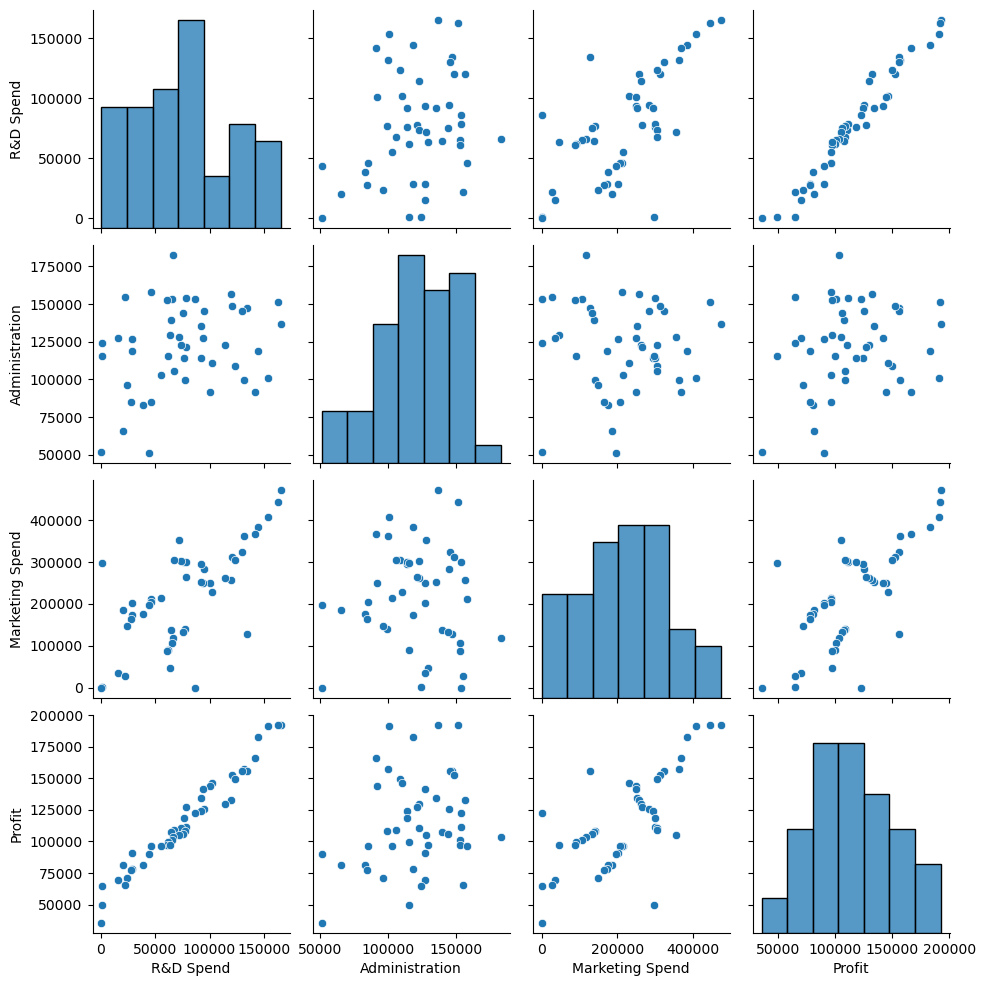

In [227]:
sns.pairplot(data)

In [228]:
data.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.269749,0.692436,0.977401
Administration,0.269749,1.000000,-0.019377,0.235033
Marketing Spend,0.692436,-0.019377,1.000000,0.719647
Profit,0.977401,0.235033,0.719647,1.000000


<AxesSubplot:>

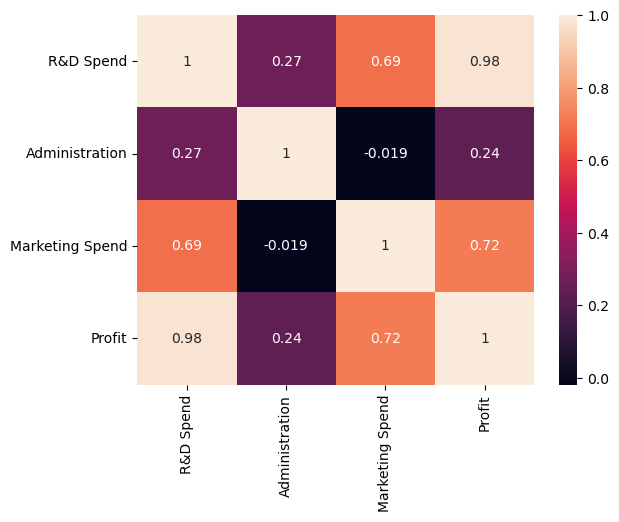

In [229]:
sns.heatmap(data.corr(), annot=True)

In [230]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        48 non-null     float64
 1   Administration   48 non-null     float64
 2   Marketing Spend  48 non-null     float64
 3   State            48 non-null     object 
 4   Profit           48 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.0+ KB


In [231]:
data = data.rename(columns={'R&D Spend':'RND', 'Administration':'ADMIN', 'Marketing Spend': 'MS'})



In [232]:
data

,RND,ADMIN,MS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [233]:
[variance_inflation_factor(data[['RND','MS','ADMIN']].values, i) for i in range(data[['RND','MS','ADMIN']].shape[1])]


[8.762444351500127, 7.634875309869776, 4.583148060788355]

In [234]:
data['State'].value_counts()

New York      17
Florida       16
California    15
Name: State, dtype: int64

In [235]:
data_state = pd.get_dummies(data['State'])

In [236]:
data = data.reset_index().drop(columns = 'index')
data_state = data_state.reset_index().drop(columns = 'index')

In [237]:
data_ = pd.concat([data,data_state], axis = 1)

In [238]:
data_ = data_.drop(columns = 'State')

In [239]:
data

,RND,ADMIN,MS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


<AxesSubplot:>

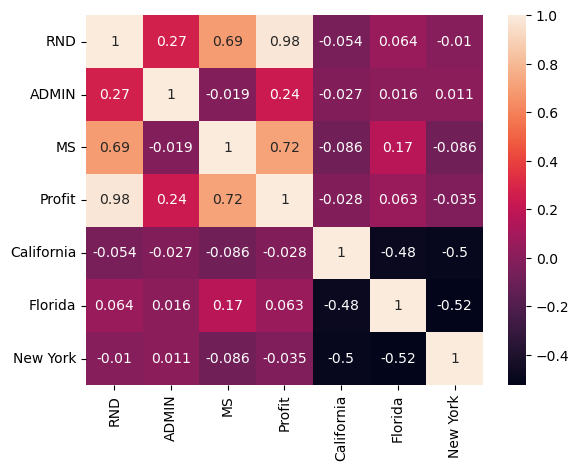

In [240]:
sns.heatmap(data_.corr(), annot=True)

In [241]:
X = data_.drop(columns = 'Profit')

In [242]:
y = data_['Profit']

In [243]:
#Split the data into train and test

In [268]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state= 2)

In [269]:
train_X.shape, test_X.shape

((33, 6), (15, 6))

In [270]:
train_X #(2,10,4) (20,18,24) (30,3,11)

,RND,ADMIN,MS,California,Florida,New York
44,22177.74,154806.14,28334.72,1,0,0
29,65605.48,153032.06,107138.38,0,0,1
27,72107.60,127864.55,353183.81,0,0,1
1,162597.70,151377.59,443898.53,1,0,0
24,77044.01,99281.34,140574.81,0,0,1
33,55493.95,103057.49,214634.81,0,1,0
38,20229.59,65947.93,185265.10,0,0,1
19,86419.70,153514.11,0.00,0,0,1
36,28663.76,127056.21,201126.82,0,1,0
10,101913.08,110594.11,229160.95,0,1,0


In [271]:
test_X #(34,14,9) (26,23,35) (0,16,32)

,RND,ADMIN,MS,California,Florida,New York
23,67532.53,105751.03,304768.73,0,1,0
12,93863.75,127320.38,249839.44,0,1,0
42,23640.93,96189.63,148001.11,1,0,0
16,78013.11,121597.55,264346.06,1,0,0
35,46014.02,85047.44,205517.64,0,0,1
43,15505.73,127382.30,35534.17,0,0,1
46,1315.46,115816.21,297114.46,0,1,0
13,91992.39,135495.07,252664.93,1,0,0
14,119943.24,156547.42,256512.92,0,1,0
0,165349.20,136897.80,471784.10,0,0,1


In [272]:
#Startified Sample

# Modeling

/Users/mohamednoordeenalaudeen/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='RND', ylabel='Profit'>

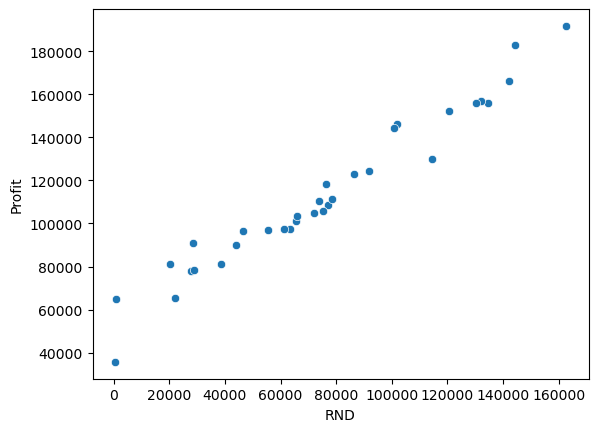

In [273]:
sns.scatterplot(train_X['RND'],train_y)

In [274]:
reg = LinearRegression()

In [275]:
reg.fit(train_X[['RND']], train_y)

LinearRegression()

In [276]:
reg.intercept_

52415.14595346744

In [277]:
reg.coef_

array([0.81151079])

In [278]:
#Profit = 47660.7 + 0.86 * (RND)

In [279]:
train_X

,RND,ADMIN,MS,California,Florida,New York
44,22177.74,154806.14,28334.72,1,0,0
29,65605.48,153032.06,107138.38,0,0,1
27,72107.60,127864.55,353183.81,0,0,1
1,162597.70,151377.59,443898.53,1,0,0
24,77044.01,99281.34,140574.81,0,0,1
33,55493.95,103057.49,214634.81,0,1,0
38,20229.59,65947.93,185265.10,0,0,1
19,86419.70,153514.11,0.00,0,0,1
36,28663.76,127056.21,201126.82,0,1,0
10,101913.08,110594.11,229160.95,0,1,0


In [280]:
train_predict = reg.predict(train_X[['RND']])

In [281]:
train_predict

array([ 70412.6213062 , 105654.70098948, 110931.24154052, 184364.93426198,
       114937.19152938,  97449.08527059,  68831.67655672, 122545.66514707,
        75676.09653349, 135118.71022202, 167736.78598949, 161657.04451693,
       169574.91473919,  83705.79294289, 159434.67352232, 103872.1201535 ,
       106016.66726315, 114295.97627706, 113545.33690955,  88178.38598249,
       116029.04683962,  75050.55155457, 102027.97810883,  90090.4027898 ,
       158153.4846292 ,  52855.02537828, 134111.52794782, 126870.57945273,
       112462.52994464, 150236.70183141,  53226.84339298, 145352.29141018,
        75749.59506593])

Text(0, 0.5, 'PROFIT')

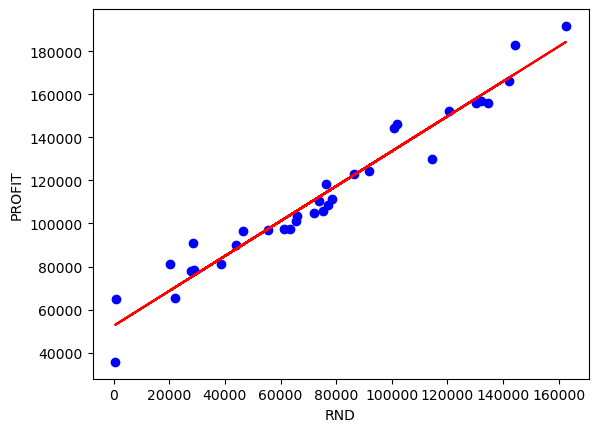

In [282]:
plt.scatter(train_X['RND'], train_y, color = 'blue')
plt.plot(train_X['RND'], reg.predict(train_X[['RND']]), color = 'red')
plt.xlabel("RND")
plt.ylabel('PROFIT')

In [283]:
test_predict = reg.predict(test_X[['RND']])

In [284]:
test_predict

array([107218.52286125, 128586.59205844,  71600.01578199, 115723.62663793,
        89756.01976794,  64998.2131867 ,  53482.65593995, 127067.96322268,
       149750.37964396, 186597.80620624, 176934.58726314, 152502.73210663,
       129230.45283594, 102724.33551947, 104891.25598166])

Text(0, 0.5, 'PROFIT')

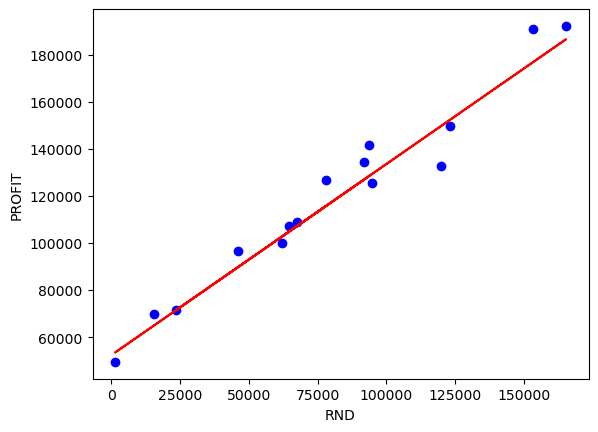

In [285]:
plt.scatter(test_X['RND'], test_y, color = 'blue')
plt.plot(test_X['RND'], reg.predict(test_X[['RND']]), color = 'red')
plt.xlabel("RND")
plt.ylabel('PROFIT')

Text(0, 0.5, 'PROFIT')

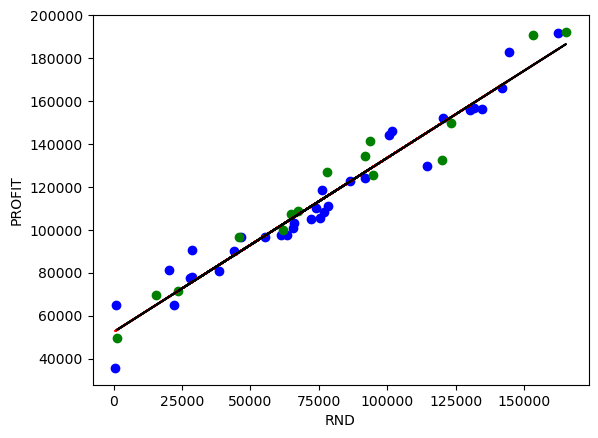

In [286]:
plt.scatter(train_X['RND'], train_y, color = 'blue')
plt.scatter(test_X['RND'], test_y, color = 'green')
plt.plot(train_X['RND'], reg.predict(train_X[['RND']]), color = 'red')
plt.plot(test_X['RND'], reg.predict(test_X[['RND']]), color = 'black')
plt.xlabel("RND")
plt.ylabel('PROFIT')

# ERROR METRICS

In [287]:
def returnError(actual,pred):
    mse = mean_squared_error(actual,pred)
    rmse = np.sqrt(mean_squared_error(actual,pred))
    mae = mean_absolute_error(actual,pred)
    mape = mean_absolute_percentage_error(actual,pred)
    r2 = r2_score(actual,pred)
    print("MSE = ", mse)
    print("RMSE = ", rmse)
    print("MAE = ", mae)
    print("MAPE = ", mape)
    print("R2 Score = ", r2)
    

In [288]:
print("TRAIN ERROR")
returnError(train_y, reg.predict(train_X[['RND']]))

"""
TRAIN ERROR
MSE =  61945103.48156878
RMSE =  7870.5211696284
MAE =  6427.590837443251
MAPE =  0.05833276256763162
R2 Score =  0.957362072319972
"""

TRAIN ERROR
MSE =  58492961.84480067
RMSE =  7648.069157950958
MAE =  6124.247739241965
MAPE =  0.06710386817927232
R2 Score =  0.9531121894671343


'\nTRAIN ERROR\nMSE =  61945103.48156878\nRMSE =  7870.5211696284\nMAE =  6427.590837443251\nMAPE =  0.05833276256763162\nR2 Score =  0.957362072319972\n'

In [289]:
print("TEST ERROR")
returnError(test_y, reg.predict(test_X[['RND']]))

"""
TEST ERROR
MSE =  62829837.018058464
RMSE =  7926.527424923127
MAE =  6373.097207808289
MAPE =  0.08225411493078758
R2 Score =  0.9391167382966855
"""

TEST ERROR
MSE =  66425119.6075113
RMSE =  8150.160710532725
MAE =  6495.4009761298785
MAPE =  0.053430073341968316
R2 Score =  0.956963083961867


'\nTEST ERROR\nMSE =  62829837.018058464\nRMSE =  7926.527424923127\nMAE =  6373.097207808289\nMAPE =  0.08225411493078758\nR2 Score =  0.9391167382966855\n'

In [ ]:
#By Default : Train error < Test Error


# Modelling -   Marketing VS Profit

In [312]:
reg = LinearRegression()

In [313]:
reg.fit(train_X[['MS']], train_y)

LinearRegression()

In [314]:
reg.intercept_

69184.4579547524

In [315]:
reg.coef_

array([0.21530242])

In [316]:
#Profit = 47660.7 + 0.86 * (RND)

In [317]:
train_X

,RND,ADMIN,MS,California,Florida,New York
44,22177.74,154806.14,28334.72,1,0,0
29,65605.48,153032.06,107138.38,0,0,1
27,72107.60,127864.55,353183.81,0,0,1
1,162597.70,151377.59,443898.53,1,0,0
24,77044.01,99281.34,140574.81,0,0,1
33,55493.95,103057.49,214634.81,0,1,0
38,20229.59,65947.93,185265.10,0,0,1
19,86419.70,153514.11,0.00,0,0,1
36,28663.76,127056.21,201126.82,0,1,0
10,101913.08,110594.11,229160.95,0,1,0


In [318]:
train_predict = reg.predict(train_X[['RND']])

/Users/mohamednoordeenalaudeen/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- RND
Feature names seen at fit time, yet now missing:
- MS

  warnings.warn(message, FutureWarning)


In [319]:
train_predict

array([ 73959.37905116,  83309.47657666,  84709.39874904, 104192.13628252,
        85772.2197691 ,  81132.4396958 ,  73539.93764126,  87790.82851708,
        75355.83485457,  91126.59072804,  99780.5121839 ,  98167.49228811,
       100268.1872368 ,  77486.19847678,  97577.87369226,  82836.53897441,
        83405.51006816,  85602.09856179,  85402.94597613,  78672.82484752,
        86061.90056337,  75189.87113699,  82347.26853057,  79180.10318579,
        97237.96069033,  69301.16263162,  90859.37458829,  88938.2741534 ,
        85115.66580385,  95137.55424688,  69399.8098945 ,  93841.66835696,
        75375.33479477])

Text(0, 0.5, 'PROFIT')

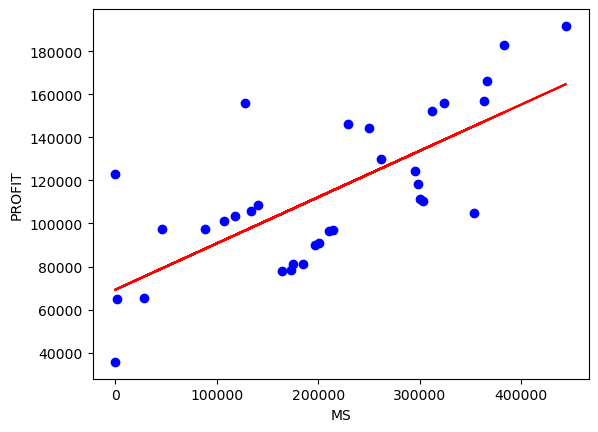

In [321]:
plt.scatter(train_X['MS'], train_y, color = 'blue')
plt.plot(train_X['MS'], reg.predict(train_X[['MS']]), color = 'red')
plt.xlabel("MS")
plt.ylabel('PROFIT')

In [283]:
test_predict = reg.predict(test_X[['MS']])

In [284]:
test_predict

array([107218.52286125, 128586.59205844,  71600.01578199, 115723.62663793,
        89756.01976794,  64998.2131867 ,  53482.65593995, 127067.96322268,
       149750.37964396, 186597.80620624, 176934.58726314, 152502.73210663,
       129230.45283594, 102724.33551947, 104891.25598166])

Text(0, 0.5, 'PROFIT')

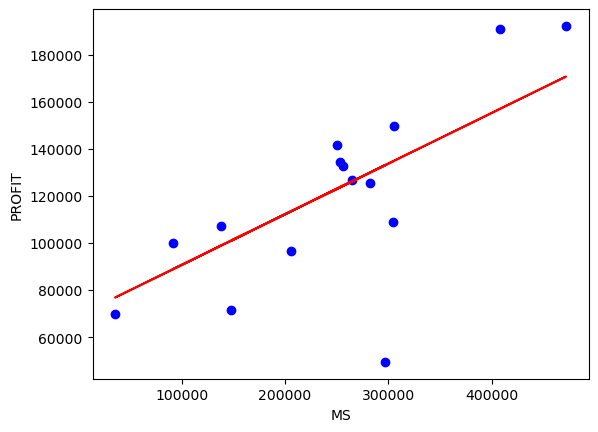

In [322]:
plt.scatter(test_X['MS'], test_y, color = 'blue')
plt.plot(test_X['MS'], reg.predict(test_X[['MS']]), color = 'red')
plt.xlabel("MS")
plt.ylabel('PROFIT')

Text(0, 0.5, 'PROFIT')

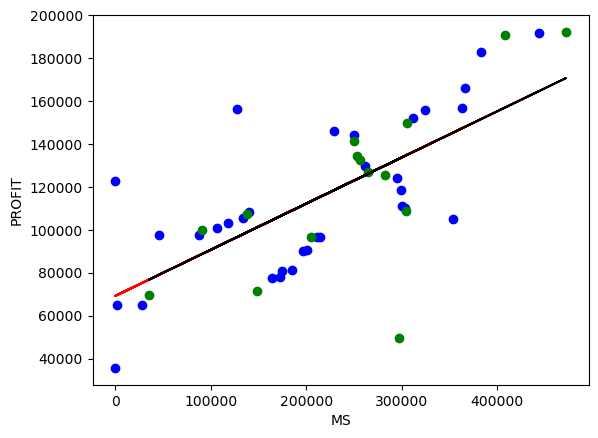

In [325]:
plt.scatter(train_X['MS'], train_y, color = 'blue')
plt.scatter(test_X['MS'], test_y, color = 'green')
plt.plot(train_X['MS'], reg.predict(train_X[['MS']]), color = 'red')
plt.plot(test_X['MS'], reg.predict(test_X[['MS']]), color = 'black')
plt.xlabel("MS")
plt.ylabel('PROFIT')

# ERROR METRICS

In [326]:
def returnError(actual,pred):
    mse = mean_squared_error(actual,pred)
    rmse = np.sqrt(mean_squared_error(actual,pred))
    mae = mean_absolute_error(actual,pred)
    mape = mean_absolute_percentage_error(actual,pred)
    r2 = r2_score(actual,pred)
    print("MSE = ", mse)
    print("RMSE = ", rmse)
    print("MAE = ", mae)
    print("MAPE = ", mape)
    print("R2 Score = ", r2)
    

In [327]:
print("TRAIN ERROR")
returnError(train_y, reg.predict(train_X[['MS']]))

"""
TRAIN ERROR
MSE =  61945103.48156878
RMSE =  7870.5211696284
MAE =  6427.590837443251
MAPE =  0.05833276256763162
R2 Score =  0.957362072319972
"""

TRAIN ERROR
MSE =  600906282.1817504
RMSE =  24513.389854970086
MAE =  21030.69671214478
MAPE =  0.20851044289021237
R2 Score =  0.5183150413599529


'\nTRAIN ERROR\nMSE =  61945103.48156878\nRMSE =  7870.5211696284\nMAE =  6427.590837443251\nMAPE =  0.05833276256763162\nR2 Score =  0.957362072319972\n'

In [329]:
print("TEST ERROR")
returnError(test_y, reg.predict(test_X[['MS']]))

"""
TEST ERROR
MSE =  62829837.018058464
RMSE =  7926.527424923127
MAE =  6373.097207808289
MAPE =  0.08225411493078758
R2 Score =  0.9391167382966855
"""

TEST ERROR
MSE =  765352574.1884414
RMSE =  27665.006311013945
MAE =  19765.404668043593
MAPE =  0.23454243566622193
R2 Score =  0.504127133386566


'\nTEST ERROR\nMSE =  62829837.018058464\nRMSE =  7926.527424923127\nMAE =  6373.097207808289\nMAPE =  0.08225411493078758\nR2 Score =  0.9391167382966855\n'

In [ ]:
#By Default : Train error < Test Error


# Multiple Linear Regression

In [312]:
reg = LinearRegression()

In [331]:
reg.fit(train_X, train_y)

LinearRegression()

In [332]:
reg.intercept_

49441.74738095431

In [333]:
reg.coef_

array([ 7.53390845e-01,  1.12904864e-02,  2.96687024e-02,  1.27918449e+03,
        1.19464424e+02, -1.39864891e+03])

In [337]:
train_predict = reg.predict(train_X)

In [338]:
train_predict

array([ 70017.92913975, 102376.12958187, 114290.46248245, 188099.57047469,
       111378.95708337,  98901.35118179,  69525.04569968, 114884.15823725,
        78557.92435361, 134389.16258402, 168519.1801876 , 157590.12618655,
       169520.84882807,  85899.4706144 , 159290.52992495, 101318.82829804,
       104891.28326365, 118316.49637433, 111917.74977951,  90347.44756442,
       117730.00078807,  76411.54072092,  98444.0868152 ,  93732.44237681,
       158978.73606412,  49035.67930534, 135012.2222473 , 128723.17014621,
       115693.40171871, 149783.00071641,  50254.89793228, 143475.10260494,
        78849.24672369])

In [339]:
test_predict = reg.predict(test_X)

In [341]:
test_predict

array([110675.67496845, 129127.22274455,  74008.82069896, 118710.9948062 ,
        89767.3085438 ,  62217.43433291,  60674.88917121, 129053.20216708,
       149303.25274039, 188158.53678806, 178407.51160699, 153915.7509447 ,
       129378.54577962, 100276.67741224, 105107.5273475 ])

# ERROR METRICS

In [342]:
def returnError(actual,pred):
    mse = mean_squared_error(actual,pred)
    rmse = np.sqrt(mean_squared_error(actual,pred))
    mae = mean_absolute_error(actual,pred)
    mape = mean_absolute_percentage_error(actual,pred)
    r2 = r2_score(actual,pred)
    print("MSE = ", mse)
    print("RMSE = ", rmse)
    print("MAE = ", mae)
    print("MAPE = ", mape)
    print("R2 Score = ", r2)
    

In [344]:
print("TRAIN ERROR")
returnError(train_y, reg.predict(train_X))

"""
TRAIN ERROR
MSE =  61945103.48156878
RMSE =  7870.5211696284
MAE =  6427.590837443251
MAPE =  0.05833276256763162
R2 Score =  0.957362072319972
"""

TRAIN ERROR
MSE =  50759928.29401249
RMSE =  7124.600219943045
MAE =  5540.952088159677
MAPE =  0.05972665314430271
R2 Score =  0.9593109696372288


'\nTRAIN ERROR\nMSE =  61945103.48156878\nRMSE =  7870.5211696284\nMAE =  6427.590837443251\nMAPE =  0.05833276256763162\nR2 Score =  0.957362072319972\n'

In [345]:
print("TEST ERROR")
returnError(test_y, reg.predict(test_X))

"""
TEST ERROR
MSE =  62829837.018058464
RMSE =  7926.527424923127
MAE =  6373.097207808289
MAPE =  0.08225411493078758
R2 Score =  0.9391167382966855
"""

TEST ERROR
MSE =  65520469.39394565
RMSE =  8094.471532715749
MAE =  6675.394891899269
MAPE =  0.06312798426381859
R2 Score =  0.9575492079389882


'\nTEST ERROR\nMSE =  62829837.018058464\nRMSE =  7926.527424923127\nMAE =  6373.097207808289\nMAPE =  0.08225411493078758\nR2 Score =  0.9391167382966855\n'

In [ ]:
#By Default : Train error < Test Error


# Modelling with Scaled train columns

In [347]:

scale = StandardScaler()

In [348]:
scale.fit(train_X)

StandardScaler()

In [352]:
train_X_scaled = pd.DataFrame(scale.transform(train_X), columns=train_X.columns)
test_X_scaled = pd.DataFrame(scale.transform(test_X), columns=test_X.columns)

In [353]:
reg = LinearRegression()

In [354]:
reg.fit(train_X_scaled, train_y)

LinearRegression()

In [355]:
reg.intercept_

113519.88424242423

In [356]:
reg.coef_

array([32012.52128831,   355.80323595,  3504.03452726,   614.65479857,
          81.68432525,  -654.93475992])

In [361]:
train_predict = reg.predict(train_X_scaled)

In [362]:
train_predict

array([ 70017.92913963, 102376.1295818 , 114290.46248233, 188099.57047464,
       111378.95708349,  98901.35118179,  69525.04569975, 114884.1582373 ,
        78557.92435348, 134389.1625841 , 168519.18018776, 157590.12618665,
       169520.84882813,  85899.47061446, 159290.52992505, 101318.82829808,
       104891.28326348, 118316.4963743 , 111917.74977948,  90347.44756458,
       117730.00078791,  76411.54072096,  98444.08681513,  93732.44237661,
       158978.7360641 ,  49035.67930553, 135012.22224743, 128723.17014622,
       115693.40171863, 149783.00071636,  50254.89793222, 143475.102605  ,
        78849.24672361])

In [363]:
test_predict = reg.predict(test_X_scaled)

In [364]:
test_predict

array([110675.67496842, 129127.22274454,  74008.82069895, 118710.99480616,
        89767.30854385,  62217.43433286,  60674.88917099, 129053.20216704,
       149303.25274035, 188158.53678806, 178407.51160712, 153915.75094479,
       129378.54577954, 100276.6774123 , 105107.52734746])

# ERROR METRICS

In [342]:
def returnError(actual,pred):
    mse = mean_squared_error(actual,pred)
    rmse = np.sqrt(mean_squared_error(actual,pred))
    mae = mean_absolute_error(actual,pred)
    mape = mean_absolute_percentage_error(actual,pred)
    r2 = r2_score(actual,pred)
    print("MSE = ", mse)
    print("RMSE = ", rmse)
    print("MAE = ", mae)
    print("MAPE = ", mape)
    print("R2 Score = ", r2)
    

In [365]:
print("TRAIN ERROR")
returnError(train_y, reg.predict(train_X_scaled))

"""
TRAIN ERROR
MSE =  61945103.48156878
RMSE =  7870.5211696284
MAE =  6427.590837443251
MAPE =  0.05833276256763162
R2 Score =  0.957362072319972
"""

TRAIN ERROR
MSE =  50759928.2940125
RMSE =  7124.600219943046
MAE =  5540.952088164762
MAPE =  0.059726653144427745
R2 Score =  0.9593109696372288


'\nTRAIN ERROR\nMSE =  61945103.48156878\nRMSE =  7870.5211696284\nMAE =  6427.590837443251\nMAPE =  0.05833276256763162\nR2 Score =  0.957362072319972\n'

In [367]:
print("TEST ERROR")
returnError(test_y, reg.predict(test_X_scaled))

"""
TEST ERROR
MSE =  62829837.018058464
RMSE =  7926.527424923127
MAE =  6373.097207808289
MAPE =  0.08225411493078758
R2 Score =  0.9391167382966855
"""

TEST ERROR
MSE =  65520469.3934085
RMSE =  8094.471532682569
MAE =  6675.394891884544
MAPE =  0.06312798426355966
R2 Score =  0.9575492079393363


'\nTEST ERROR\nMSE =  62829837.018058464\nRMSE =  7926.527424923127\nMAE =  6373.097207808289\nMAPE =  0.08225411493078758\nR2 Score =  0.9391167382966855\n'

In [372]:
residual = train_y-train_predict

<AxesSubplot:xlabel='Profit', ylabel='Density'>

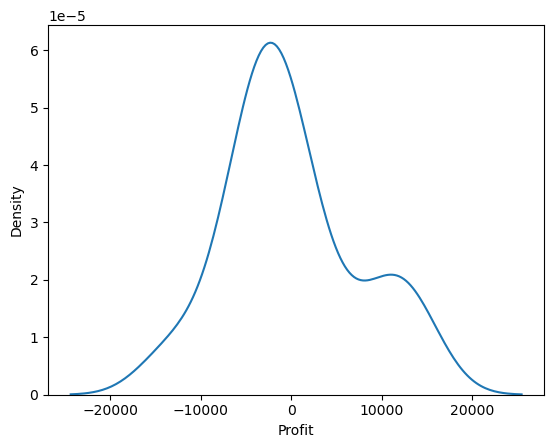

In [376]:
# Error Plot
sns.kdeplot(residual)

<AxesSubplot:ylabel='Profit'>

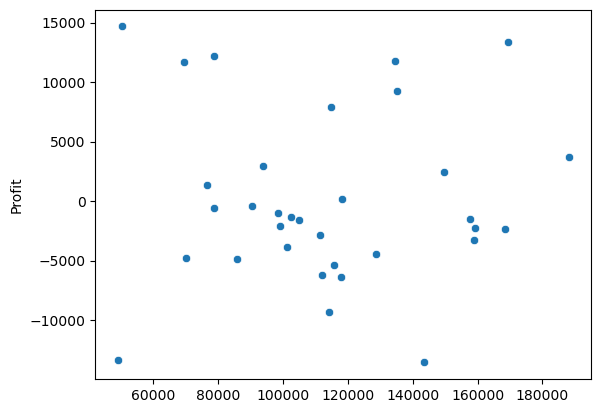

In [377]:
sns.scatterplot(x = train_predict, y = residual)

In [378]:
### The relationship between the actual and predicted data should be linear


<AxesSubplot:ylabel='Profit'>

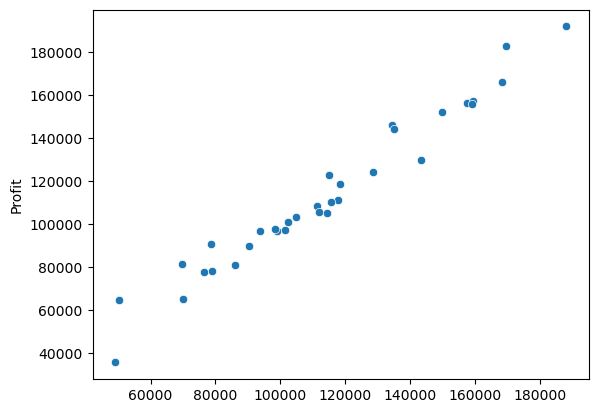

In [379]:
sns.scatterplot(x = train_predict,y= train_y )

In [290]:
import statsmodels.api as sm

In [300]:
train_X_ols = train_X.copy()

In [304]:
x = train_X_ols['RND'].tolist()
y = train_y.tolist()

In [305]:
x = sm.add_constant(x)

In [306]:

result = sm.OLS(y, x).fit()

In [307]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     630.2
Date:                Sun, 06 Aug 2023   Prob (F-statistic):           3.66e-22
Time:                        11:18:53   Log-Likelihood:                -341.92
No. Observations:                  33   AIC:                             687.8
Df Residuals:                      31   BIC:                             690.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.242e+04   2795.010     18.753      0.000    4.67e+04    5.81e+04
x1             0.8115      0.032     25.103      0.000       0.746       0.877
==============================================================================
Omnibus:                        0.124   Durbin-Watson:                   2.441
Prob(Omnibus):                  0.940   Jarque-Bera (JB):                0.163
Skew:                           0.122   Prob(JB):                        0.922
Kurtosis:                       2.756   Cond. No.                     1.76e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.76e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#Confidene interval
#Profit = 46700.0.0 + 0.746*(RND)

#Profit = 52420.0 + 0.8115*(RND)

#Profit = 58100.0.0 + 0.877*(RND)